# Pretreatment

## Data import

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv(".\\nba_logreg.csv")

# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
#paramset = df[["GP","MIN","PTS"]].columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values
#df_vals = df[["GP","MIN","PTS"]].values

## Duplicates

In [2]:
initial_size = len(df)

In [3]:
df.drop_duplicates(keep='first', inplace=True)
print("deletion of " + str(initial_size - len(df)) + " duplicates" )

deletion of 12 duplicates


## Missing values

In [4]:
df.isna().any()

Name           False
GP             False
MIN            False
PTS            False
FGM            False
FGA            False
FG%            False
3P Made        False
3PA            False
3P%             True
FTM            False
FTA            False
FT%            False
OREB           False
DREB           False
REB            False
AST            False
STL            False
BLK            False
TOV            False
TARGET_5Yrs    False
dtype: bool

In [5]:
df.isna().sum()

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            10
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [6]:
df.loc[df['3P%'].isna()]

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,Ken Johnson,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,...,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,Pete Williams,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,...,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,Melvin Turpin,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,...,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,Jim Petersen,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,...,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,Tom Scheffler,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,...,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,Sam Williams,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,...,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,Kurt Nimphius,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,...,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,Pete Verhoeven,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,...,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,Jim Smith,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,...,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0
559,Jeff Wilkins,56,18.9,4.7,2.1,4.6,45.0,0.0,0.0,NaN,...,0.7,67.5,1.1,3.8,4.9,0.7,0.6,0.8,1.1,1.0


In [7]:
'''
The missing values are caracterized by 3PA=0 so we replace them by 0
'''

df["3P%"]=df['3P%'].fillna(0) 

## Outliers

GP


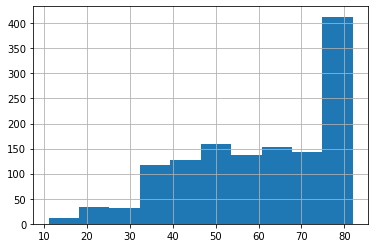

MIN


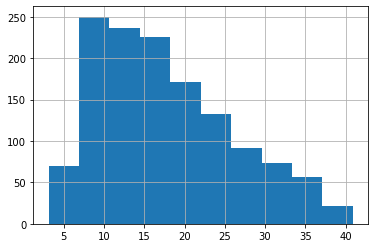

PTS


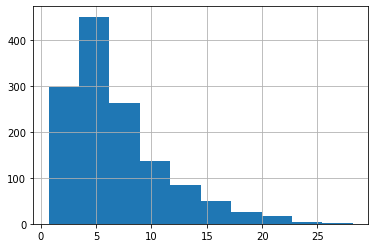

FGM


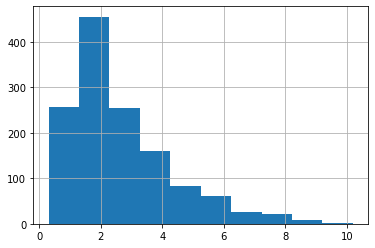

FGA


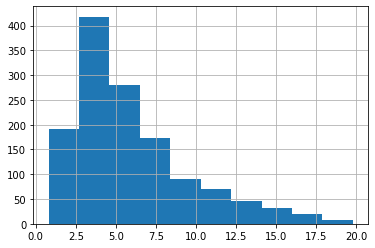

FG%


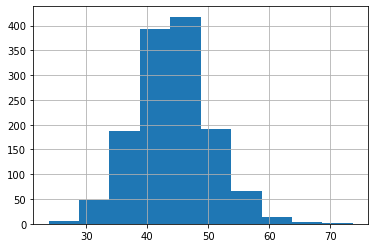

3P Made


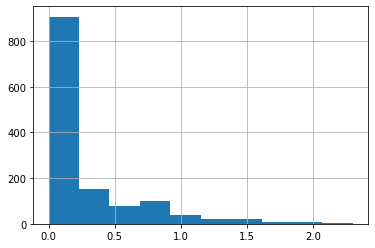

3PA


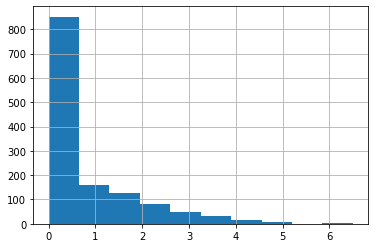

3P%


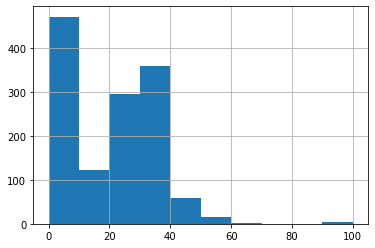

FTM


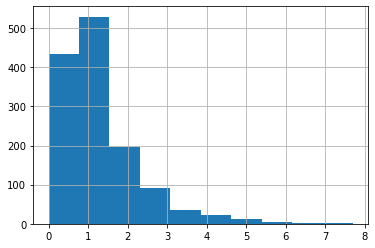

FTA


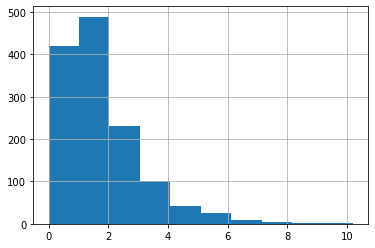

FT%


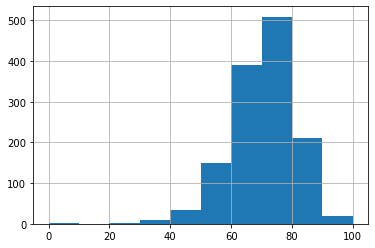

OREB


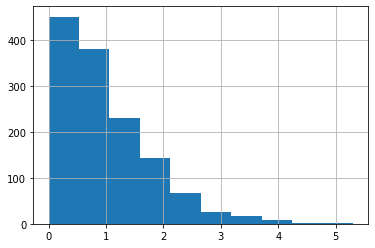

DREB


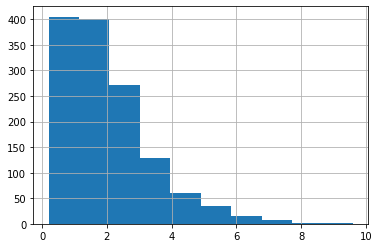

REB


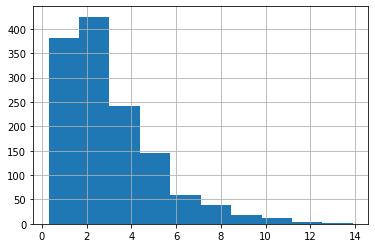

AST


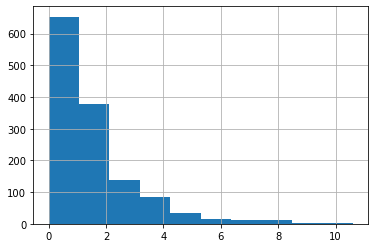

STL


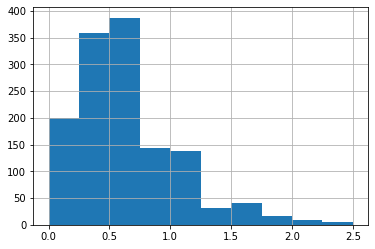

BLK


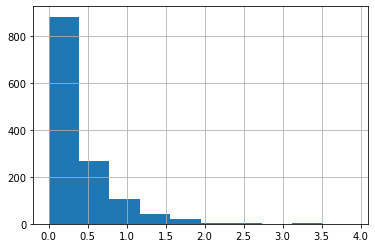

TOV


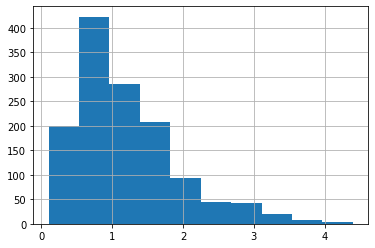

TARGET_5Yrs


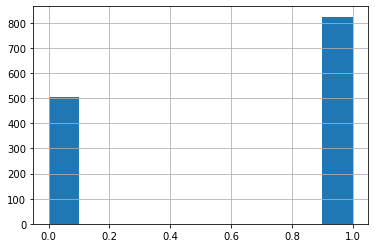

In [8]:
#data viz

import matplotlib.pyplot as plt

for var in df.columns:
    if type(df[var][df.index[0]]) != str:
        hist = df[var].hist()
        print(var)
        plt.show()

An analysis of the histograms seems to show that there are no obvious outliers. We will therefore keep all the values

We can however notice that the dataset is a bit unbalanced :

In [9]:
df.TARGET_5Yrs.value_counts()

1.0    824
0.0    504
Name: TARGET_5Yrs, dtype: int64

It might therefore be relevant to perform over/under sampling

## Preparing the data for training

In [10]:
# extract names, labels, features names and values
names = df['Name'].values.tolist() # players names
labels = df['TARGET_5Yrs'].values # labels
paramset = df.drop(['TARGET_5Yrs','Name'],axis=1).columns.values
df_vals = df.drop(['TARGET_5Yrs','Name'],axis=1).values


In [11]:
#normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_vals)

In [12]:
X

array([[0.35211268, 0.64285714, 0.24363636, ..., 0.16      , 0.1025641 ,
        0.27906977],
       [0.33802817, 0.62962963, 0.23636364, ..., 0.44      , 0.12820513,
        0.34883721],
       [0.88732394, 0.32275132, 0.16363636, ..., 0.2       , 0.07692308,
        0.20930233],
       ...,
       [0.45070423, 0.23809524, 0.17090909, ..., 0.12      , 0.1025641 ,
        0.18604651],
       [0.57746479, 0.23544974, 0.13818182, ..., 0.16      , 0.02564103,
        0.1627907 ],
       [0.50704225, 0.22751323, 0.13454545, ..., 0.28      , 0.02564103,
        0.18604651]])

In [13]:
import joblib
joblib.dump(scaler, 'nba.scaler')

['nba.scaler']

# Training 

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import KFold
import numpy as np
import sklearn

def score_classifier(dataset,classifier,labels):

    """
    performs 3 random trainings/tests to build a confusion matrix and prints results with precision and recall scores
    :param dataset: the dataset to work on
    :param classifier: the classifier to use
    :param labels: the labels used for training and validation
    :return classifier: the classifier trained
    """


    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    confusion_mat = np.zeros((2,2))
    recall = 0
    for training_ids,test_ids in kf.split(dataset):
        training_set = dataset[training_ids]
        training_labels = labels[training_ids]
        test_set = dataset[test_ids]
        test_labels = labels[test_ids]
        classifier.fit(training_set,training_labels)
        predicted_labels = classifier.predict(test_set)
        confusion_mat+=confusion_matrix(test_labels,predicted_labels)
        recall += recall_score(test_labels, predicted_labels)
    recall/=3
    print(confusion_mat)
    print("recall :", recall)

## SVC

In [15]:
from sklearn.svm import SVC

#first test
score_classifier(X,SVC(),labels)

[[270. 234.]
 [142. 682.]]
recall : 0.8274446177323874


Recall of 82.4%.
We tune the parameters to improve the recall

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV

#parameters to test
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

In [18]:
#gridsearch with cross validation
svc = SVC()
kf = KFold(n_splits=3,random_state=50,shuffle=True)
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000027C531DFEB0>,
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [19]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [20]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 1000, 'kernel': 'linear'}


The best parameters among the tested parameters are printed above

We perform another gridsearch to improve the parameters

In [21]:
#parameters_to_test
tuned_parameters = [{"kernel": ["linear"], "C": [50, 100, 150, 200, 500]}]

In [22]:
#second gridsearch
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000027C5320E9E0>,
             estimator=SVC(),
             param_grid=[{'C': [50, 100, 150, 200, 500], 'kernel': ['linear']}])

In [23]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [24]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 500, 'kernel': 'linear'}


Last gridsearch

In [25]:
#parameters to test
tuned_parameters = [{"kernel": ["linear"], "C": [150 - 5*i for i in range(5)] + [150 + 5*i for i in range(5)]}]

In [26]:
#third gridsearch
clf = GridSearchCV(svc, tuned_parameters, cv=kf.split(X))
clf.fit(X, labels)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000027C53236040>,
             estimator=SVC(),
             param_grid=[{'C': [150, 145, 140, 135, 130, 150, 155, 160, 165,
                                170],
                          'kernel': ['linear']}])

In [27]:
nb_best_params = np.argmin(clf.cv_results_['rank_test_score'])

In [28]:
print("best params: ", clf.cv_results_["params"][nb_best_params])

best params:  {'C': 150, 'kernel': 'linear'}


In [29]:
#best estimator
clf_be = clf.best_estimator_

In [30]:
#score of the best estimator
score_classifier(X,clf_be,labels)

[[266. 238.]
 [144. 680.]]
recall : 0.8249316630611595


With SVC, we manage to get a recall of 82.8%, which is an improvement of almost 0.4%

We try an other approch to perform this classification : random forest classifier

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
#first test
score_classifier(X,RandomForestClassifier(),labels)

[[269. 235.]
 [173. 651.]]
recall : 0.7901469034562559


We perform a gridsearch to improve the score

In [33]:
#parameters to test

param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 50, 100],
    'max_features': [2, 3, 5, 10, 'sqrt','auto'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [10, 50, 100, 200, 500], 
}



In [34]:
#grid search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf.split(X), n_jobs = -1, verbose = 2)
grid_search.fit(X, labels)

Fitting 3 folds for each of 1080 candidates, totalling 3240 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000027C544A7B30>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 50, 100],
                         'max_features': [2, 3, 5, 10, 'sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 500]},
             verbose=2)

In [35]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [36]:
#parameters to test

param_grid = {
    'max_depth': [2, 3, 5, 7, 8],
    'max_features': [7, 10, 15],
    'min_samples_leaf': [4, 7, 10, 20],
    'min_samples_split': [10, 15, 20],
    'n_estimators': [200], 
}



In [37]:
#grid search
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = kf.split(X), n_jobs = -1, verbose = 2)
grid_search.fit(X, labels)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


GridSearchCV(cv=<generator object _BaseKFold.split at 0x0000027C54551890>,
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 8],
                         'max_features': [7, 10, 15],
                         'min_samples_leaf': [4, 7, 10, 20],
                         'min_samples_split': [10, 15, 20],
                         'n_estimators': [200]},
             verbose=2)

In [38]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 15,
 'n_estimators': 200}

In [39]:
mdl_be = grid_search.best_estimator_


In [40]:
score_classifier(X,mdl_be,labels)

[[291. 213.]
 [160. 664.]]
recall : 0.8057151481611914


The gridsearch resulted in an increase of the average recall of about 2%, but this model is not as performant as the csv model

We try a last approach to perform the classification : the use of a neural network

## Neural network 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [42]:
"""
Initialize a neural network for binary classification
:return model: the model 
"""

def get_model():
    model = Sequential()
    model.add(Dropout(0.2))
    model.add(Dense(12, activation = "relu",bias_regularizer=regularizers.l2(1e-4),))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation = "sigmoid"))
    return model


In [43]:
mod = get_model()

In [44]:
"""
We define a scoring function that is specific to neural nets for two reasons:
- If we fit several times on a model, it does not forget the previous fits
- the NN returns probabilities between 0 and 1, not integers 
The scoring function works as previously : we split the dataset into 3 folds (the same) and we average the recalls obtained

:param model_func: function that calls an initialized model
:param epoch: number of epochs
:return l_hist: list of the history of the three trainings

"""

def score_classifier_nn(model_func=get_model,epochs=100):
    kf = KFold(n_splits=3,random_state=50,shuffle=True)
    recall = 0
    l_hist=[]
    for training_ids, test_ids in kf.split(X):
        mod = model_func()
        mod.compile(optimizer = 'adam',loss='binary_crossentropy',metrics ="Recall")
        hist = mod.fit(X[training_ids], labels[training_ids], epochs=epochs, validation_data = (X[test_ids], labels[test_ids]))
        score = mod.evaluate(X[test_ids], labels[test_ids])
        recall += score[1]
        l_hist.append(hist)
    recall/=3
    print()
    print("Average recall : ",recall)
    return l_hist


In [45]:
#test of the model with 100 epochs
l_hist = score_classifier_nn(epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 8ms/step - loss: 0.6814 - recall: 0.8388 - val_loss: 0.6676 - val_recall: 0.9928
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6623 - recall: 0.9579 - val_loss: 0.6522 - val_recall: 1.0000
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6577 - recall: 0.9780 - val_loss: 0.6414 - val_recall: 1.0000
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6474 - recall: 0.9945 - val_loss: 0.6340 - val_recall: 1.0000
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6442 - recall: 0.9982 - val_loss: 0.6295 - val_recall: 1.0000
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6304 - recall: 0.9927 - val_loss: 0.6237 - val_recall: 1.0000
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6354 - recall: 1.0000 - val_loss: 0.6184 - val_recall: 1.0000
Epoch 8/100
28/28 [======================

28/28 [==============================] - 0s 1ms/step - loss: 0.6085 - recall: 0.8114 - val_loss: 0.5806 - val_recall: 0.8309
Epoch 61/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5973 - recall: 0.8260 - val_loss: 0.5802 - val_recall: 0.8417
Epoch 62/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5965 - recall: 0.8242 - val_loss: 0.5795 - val_recall: 0.8309
Epoch 63/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5955 - recall: 0.7839 - val_loss: 0.5799 - val_recall: 0.8094
Epoch 64/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5924 - recall: 0.8004 - val_loss: 0.5789 - val_recall: 0.8525
Epoch 65/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5931 - recall: 0.8095 - val_loss: 0.5791 - val_recall: 0.8165
Epoch 66/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5973 - recall: 0.8132 - val_loss: 0.5791 - val_recall: 0.8309
Epoch 67/100
28/28 [===========================

Epoch 19/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6136 - recall: 0.8829 - val_loss: 0.5865 - val_recall: 0.9301
Epoch 20/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6134 - recall: 0.8625 - val_loss: 0.5854 - val_recall: 0.8986
Epoch 21/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6126 - recall: 0.8662 - val_loss: 0.5843 - val_recall: 0.9266
Epoch 22/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6148 - recall: 0.8755 - val_loss: 0.5842 - val_recall: 0.8951
Epoch 23/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6030 - recall: 0.8680 - val_loss: 0.5830 - val_recall: 0.8986
Epoch 24/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6106 - recall: 0.8680 - val_loss: 0.5824 - val_recall: 0.8846
Epoch 25/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6077 - recall: 0.8569 - val_loss: 0.5819 - val_recall: 0.8846
Epoch 26/100
28/28 [==============

28/28 [==============================] - 0s 1ms/step - loss: 0.5859 - recall: 0.8104 - val_loss: 0.5764 - val_recall: 0.8462
Epoch 79/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5961 - recall: 0.8086 - val_loss: 0.5778 - val_recall: 0.8217
Epoch 80/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5969 - recall: 0.7955 - val_loss: 0.5779 - val_recall: 0.8077
Epoch 81/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5997 - recall: 0.7732 - val_loss: 0.5777 - val_recall: 0.8077
Epoch 82/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5976 - recall: 0.7900 - val_loss: 0.5771 - val_recall: 0.8182
Epoch 83/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5861 - recall: 0.8160 - val_loss: 0.5758 - val_recall: 0.8427
Epoch 84/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5867 - recall: 0.8141 - val_loss: 0.5765 - val_recall: 0.8182
Epoch 85/100
28/28 [===========================

Epoch 37/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5965 - recall: 0.8688 - val_loss: 0.6054 - val_recall: 0.8885
Epoch 38/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5917 - recall: 0.8901 - val_loss: 0.6052 - val_recall: 0.8885
Epoch 39/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6049 - recall: 0.8723 - val_loss: 0.6046 - val_recall: 0.8846
Epoch 40/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5900 - recall: 0.8564 - val_loss: 0.6038 - val_recall: 0.8808
Epoch 41/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5938 - recall: 0.8599 - val_loss: 0.6040 - val_recall: 0.8846
Epoch 42/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6048 - recall: 0.8582 - val_loss: 0.6026 - val_recall: 0.8731
Epoch 43/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5964 - recall: 0.8830 - val_loss: 0.6017 - val_recall: 0.8654
Epoch 44/100
28/28 [==============

28/28 [==============================] - 0s 1ms/step - loss: 0.5887 - recall: 0.8351 - val_loss: 0.5934 - val_recall: 0.8500
Epoch 97/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5970 - recall: 0.8298 - val_loss: 0.5941 - val_recall: 0.8462
Epoch 98/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5880 - recall: 0.8245 - val_loss: 0.5935 - val_recall: 0.8385
Epoch 99/100
28/28 [==============================] - 0s 1ms/step - loss: 0.5935 - recall: 0.8351 - val_loss: 0.5939 - val_recall: 0.8500
Epoch 100/100
14/14 [==============================] - 0s 616us/step - loss: 0.5932 - recall: 0.8423

Average recall :  0.8210167487462362


Choice of the optimal number of epochs

In [46]:
hist1, hist2, hist3 = l_hist

In [47]:
hist1.history.keys()

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])

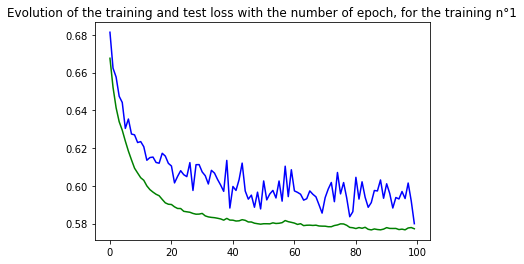

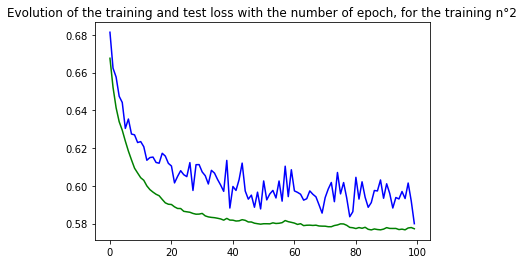

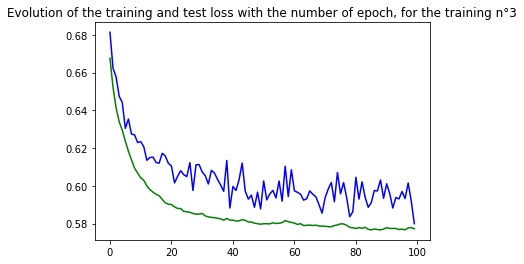

In [48]:
import matplotlib.pyplot as plt

for i in range(len(l_hist)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(hist1.history["loss"], c="blue", label = "training_loss_"+str(i))
    plt.plot(hist1.history["val_loss"], c="green", label = "test_loss_"+str(i))
    ax.set_title("Evolution of the training and test loss with the number of epoch, for the training n°{}".format(i+1))
    plt.show(fig)


In every case, the test_loss stops decreasing from the 20th epoch.
Thus, we start another training with only 20 epochs in order not to overfit.

In [49]:
l_hist = score_classifier_nn(epochs=20)

Epoch 1/20
28/28 [==============================] - 0s 6ms/step - loss: 0.7966 - recall: 0.1044 - val_loss: 0.7414 - val_recall: 0.0216
Epoch 2/20
28/28 [==============================] - 0s 1ms/step - loss: 0.7156 - recall: 0.4176 - val_loss: 0.6812 - val_recall: 0.7878
Epoch 3/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6696 - recall: 0.8370 - val_loss: 0.6404 - val_recall: 1.0000
Epoch 4/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6462 - recall: 0.9560 - val_loss: 0.6297 - val_recall: 1.0000
Epoch 5/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6456 - recall: 0.9872 - val_loss: 0.6243 - val_recall: 1.0000
Epoch 6/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6356 - recall: 0.9817 - val_loss: 0.6214 - val_recall: 1.0000
Epoch 7/20
28/28 [==============================] - 0s 1ms/step - loss: 0.6286 - recall: 0.9872 - val_loss: 0.6183 - val_recall: 1.0000
Epoch 8/20
28/28 [==============================

Epoch 20/20
14/14 [==============================] - 0s 615us/step - loss: 0.6135 - recall: 0.9692

Average recall :  0.9486492077509562


The recall is about 92%.
We will thus retain this model

In [50]:
#we train the model on all the data and export it

mdl = get_model()
mdl.compile(optimizer = 'adam',loss='binary_crossentropy',metrics ="Recall")
mdl.fit(X, labels, epochs=20)
mdl.save("./nba_nn.mdl")

Epoch 1/20
42/42 [==============================] - 0s 634us/step - loss: 0.6817 - recall: 0.6299
Epoch 2/20
42/42 [==============================] - 0s 586us/step - loss: 0.6626 - recall: 0.8483
Epoch 3/20
42/42 [==============================] - 0s 610us/step - loss: 0.6488 - recall: 0.9430
Epoch 4/20
42/42 [==============================] - 0s 610us/step - loss: 0.6459 - recall: 0.9527
Epoch 5/20
42/42 [==============================] - 0s 610us/step - loss: 0.6402 - recall: 0.9672
Epoch 6/20
42/42 [==============================] - 0s 585us/step - loss: 0.6394 - recall: 0.9721
Epoch 7/20
42/42 [==============================] - 0s 610us/step - loss: 0.6312 - recall: 0.9684
Epoch 8/20
42/42 [==============================] - 0s 634us/step - loss: 0.6240 - recall: 0.9539
Epoch 9/20
42/42 [==============================] - 0s 707us/step - loss: 0.6280 - recall: 0.9527
Epoch 10/20
42/42 [==============================] - 0s 659us/step - loss: 0.6234 - recall: 0.9466
Epoch 11/20
42/42 [

In [51]:
from keras.models import load_model
NBA_MODEL = load_model('./nba_nn.mdl')


In [52]:
!pip install pipreqs

  Using cached docopt-0.6.2.tar.gz (25 kB)
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13724 sha256=fb6e1efa71039fb0ee1ec20ada719c8f679fbf58075d0d64ef940fadec2f6f1d
  Stored in directory: c:\users\thoma\appdata\local\pip\cache\wheels\56\ea\58\ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [53]:
pwd

'C:\\Users\\thoma\\OneDrive\\Documents\\recherche_emploi\\tests_techniques\\test_mpdata'

In [62]:
cd ..

C:\Users\thoma\OneDrive\Documents\recherche_emploi\tests_techniques\test_mpdata


In [65]:
!pipreqs C:/Users/thoma/OneDrive/Documents/recherche_emploi/tests_techniques/test_mpdata

INFO: Successfully saved requirements file in C:/Users/thoma/OneDrive/Documents/recherche_emploi/tests_techniques/test_mpdata\requirements.txt


In [56]:
!ls

'ls' n’est pas reconnu en tant que commande interne
ou externe, un programme exécutable ou un fichier de commandes.


In [57]:
ls

 Le volume dans le lecteur C s’appelle Windows-SSD
 Le numéro de série du volume est 3207-6D09

 Répertoire de C:\Users\thoma\OneDrive\Documents\recherche_emploi\tests_techniques\test_mpdata

16/12/2021  09:26    <DIR>          .
17/11/2021  09:13    <DIR>          ..
14/11/2021  09:20    <DIR>          .ipynb_checkpoints
13/11/2021  11:05    <DIR>          __pycache__
17/11/2021  11:07             1 639 app.py
16/12/2021  09:26           333 240 NBA.ipynb
16/12/2021  09:19             1 326 nba.scaler
15/03/2018  08:19           129 360 nba_logreg.csv
16/12/2021  09:23    <DIR>          nba_nn.mdl
17/11/2021  11:07               617 readme.txt.txt
17/11/2021  11:08           141 567 test_technique_ThomasDELARD.zip
17/11/2021  10:52             1 361 user_interface.py
               7 fichier(s)          609 110 octets
               5 Rép(s)  842 782 736 384 octets libres


In [58]:
ls

 Le volume dans le lecteur C s’appelle Windows-SSD
 Le numéro de série du volume est 3207-6D09

 Répertoire de C:\Users\thoma\OneDrive\Documents\recherche_emploi\tests_techniques\test_mpdata

16/12/2021  09:29    <DIR>          .
17/11/2021  09:13    <DIR>          ..
14/11/2021  09:20    <DIR>          .ipynb_checkpoints
13/11/2021  11:05    <DIR>          __pycache__
17/11/2021  11:07             1 639 app.py
16/12/2021  09:19             1 326 nba.scaler
15/03/2018  08:19           129 360 nba_logreg.csv
16/12/2021  09:23    <DIR>          nba_nn.mdl
17/11/2021  11:07               617 readme.txt.txt
16/12/2021  09:29    <DIR>          test
17/11/2021  11:08           141 567 test_technique_ThomasDELARD.zip
17/11/2021  10:52             1 361 user_interface.py
               6 fichier(s)          275 870 octets
               6 Rép(s)  842 780 938 240 octets libres


In [59]:
print(pwd/"test")

NameError: name 'pwd' is not defined